In [1]:
import pprint
#import matplotlib
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import numpy as np
def print_matrix(matrix):
    for row in matrix:
        print(' '.join(f"{x:3d}" for x in row))

def plot_matrix(matrix):
    plt.figure(figsize=(12,8))
    plt.imshow(matrix)
    plt.colorbar(label="Score")
    plt.show()

def plot_matrix_3d(matrix, animate=True):
    X, Y = np.meshgrid(range(matrix.shape[1]), range(matrix.shape[0]))
    Z = matrix

    # 3D-Plot
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection="3d")

    surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

    ax.set_title("Needleman-Wunsch Score-Matrix (3D)")
    ax.set_xlabel("Sequenz 2")
    ax.set_ylabel("Sequenz 1")
    ax.set_zlabel("Score")

    fig.colorbar(surf, shrink=0.5, aspect=10, label="Score")

    if animate:
        plt.ion()
        for angle in range(0, 360, 2):
            ax.view_init(elev=30, azim=angle)
            plt.draw()
            plt.pause(0.01)

        plt.ioff()  
        plt.show()
    else:
        plt.show()
        
def calc_needleman_wunsch_simple(seq1, seq2):
    blank = -2
    hit = 1
    miss = -1

    matrix = np.zeros((len(seq1)+1, len(seq2)+1), dtype=int)

    for v in range(len(seq1)+1):
        matrix[v][0] = v * (-2)

    for v in range(len(seq2)+1):
        matrix[0][v] = v * (-2)

    for i in range(1, len(seq1)+1):
        for j in range(1, len(seq2)+1):
            if seq1[i-1] == seq2[j-1]:
                diagonal = matrix[i-1][j-1] + hit
            else:
                diagonal = matrix[i-1][j-1] + miss
            over = matrix[i-1][j] + blank
            left = matrix[i][j-1] + blank
            matrix[i][j] = max(diagonal, over, left)


    plot_matrix(matrix)
    plot_matrix_3d(matrix, False)
    return matrix[i][j]

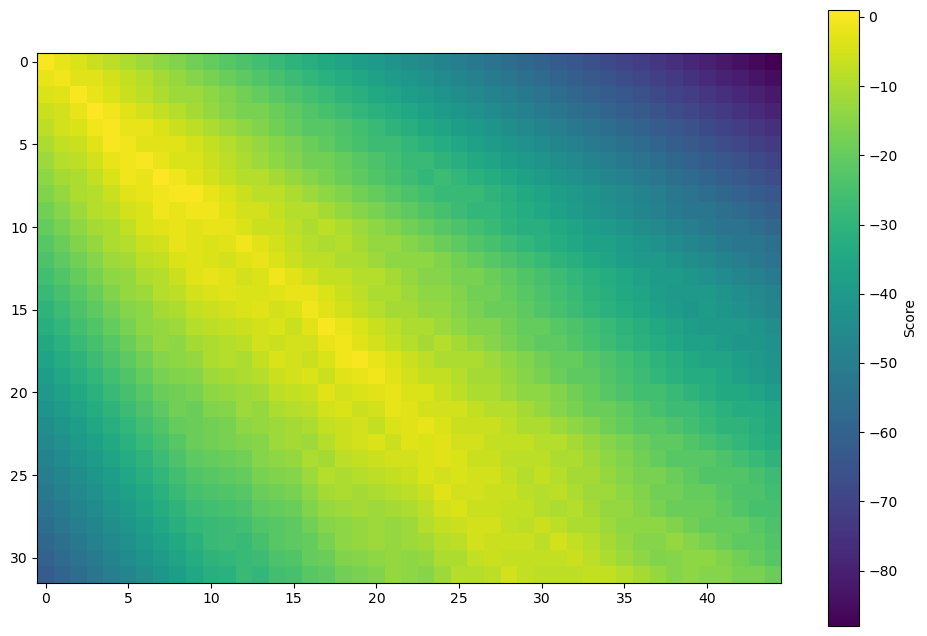

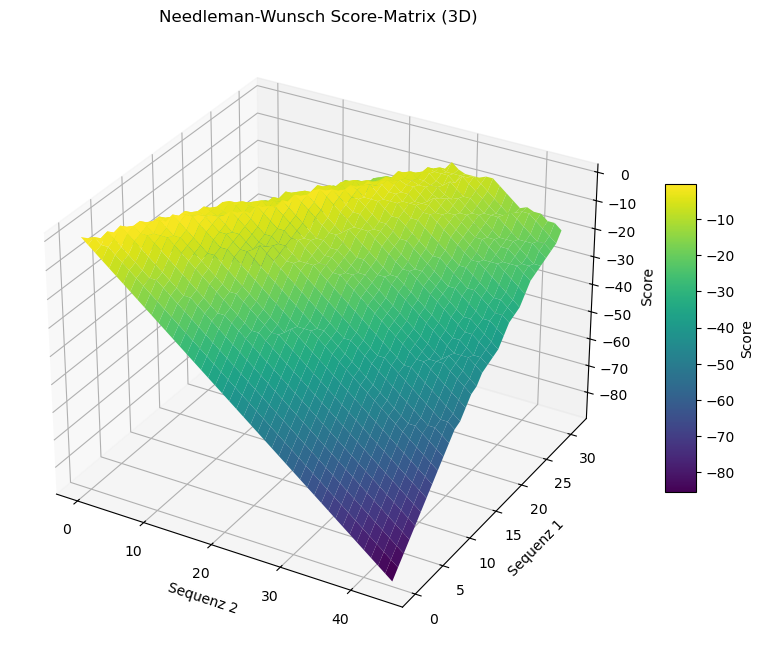

-19

In [2]:
calc_needleman_wunsch_simple("GTGACAGTGACATGGAGTGACATGAGGATGC", "ATGCGAGCTTTCGTTGATTTCTAGCTACTATTTCCCATCGTACC")


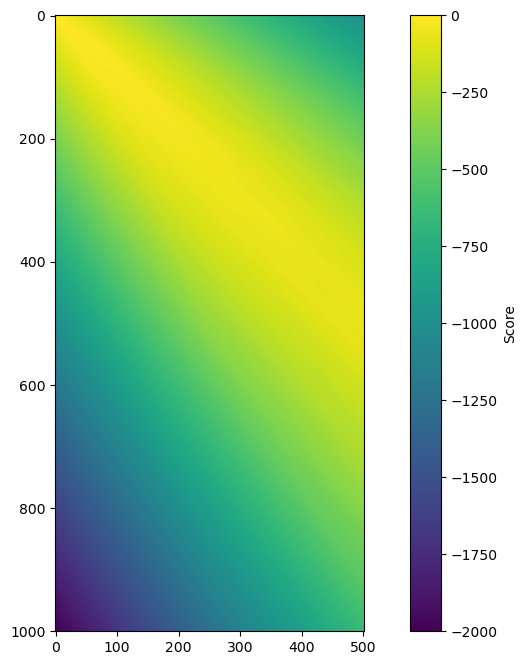

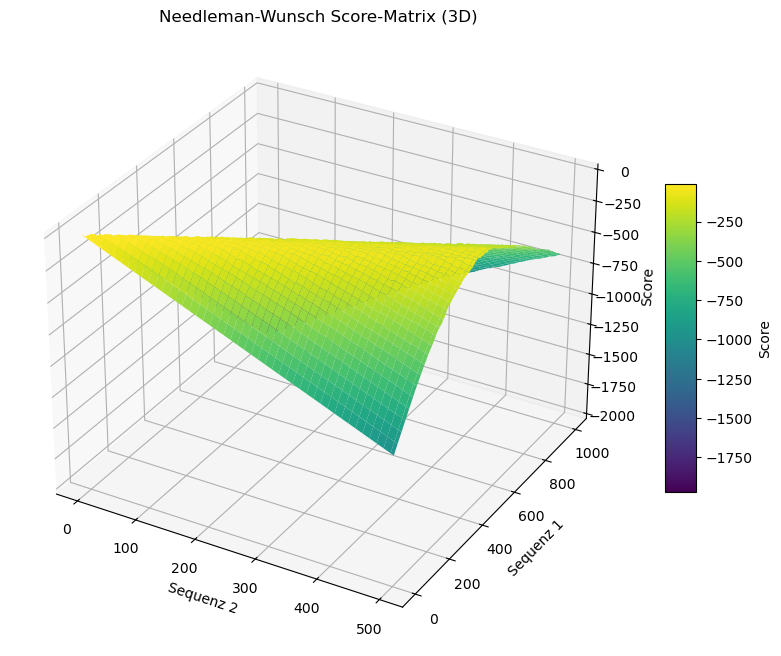

-644


In [3]:
import random

def generate_random_dna_sequence(length):
    dna = ["C", "T", "G", "A"]

    out = []

    for i in range(length): 
        out.append(dna[random.randint(0, 3)])
    
    return out

def random_test():
    seq1 = generate_random_dna_sequence(1000)
    seq2 = generate_random_dna_sequence(500)

    print(calc_needleman_wunsch_simple(seq1, seq2))

random_test()
